# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [3]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


In [5]:
# a) Obtenha a média e a diferença através de uma multiplicação matricial
transform_matrix = np.array([[0.5, 0.5], [0.5, -0.5]])
data_matrix = df[['p1', 'p2']].values
transformed_data = data_matrix @ transform_matrix

df['mean'] = transformed_data[:, 0]
df['diff'] = transformed_data[:, 1]

# Imprimindo as primeiras linhas para verificar os resultados
print("Dados transformados (Média e Diferença):")
print(df.head())

Dados transformados (Média e Diferença):
         p1        p2      mean      diff
0  6.964692  7.943428  7.454060 -0.489368
1  2.861393  5.099537  3.980465 -1.119072
2  2.268515  0.974429  1.621472  0.647043
3  5.513148  4.474359  4.993754  0.519394
4  7.194690  8.938402  8.066546 -0.871856


In [6]:
# b) Calcule a correlação entre os dados da p1 e p2
corr_original = df[['p1', 'p2']].corr().iloc[0, 1]
print(f"\nCorrelação entre p1 e p2: {corr_original:.2f}")


Correlação entre p1 e p2: 0.90


In [7]:
# c) Calcule a correlação entre os dados transformados (média e diferença)
corr_transformed = df[['mean', 'diff']].corr().iloc[0, 1]
print(f"Correlação entre a média e a diferença: {corr_transformed:.2f}")

Correlação entre a média e a diferença: -0.13


In [9]:
# d) Comente as correlações observadas
if corr_transformed < corr_original:
    print("A correlação entre a média e a diferença é menor do que entre p1 e p2, "
          "o que indica que a transformação reduziu a relação linear entre os dados.")
else:
    print("A correlação entre a média e a diferença não reduziu, sugerindo que "
          "os dados transformados ainda mantêm alguma relação linear.")

A correlação entre a média e a diferença é menor do que entre p1 e p2, o que indica que a transformação reduziu a relação linear entre os dados.


## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.


Dados transformados (Soma e Diferença):
         sum     diff2
0  14.908120 -0.978736
1   7.960930 -2.238143
2   3.242944  1.294085
3   9.987507  1.038788
4  16.133092 -1.743712


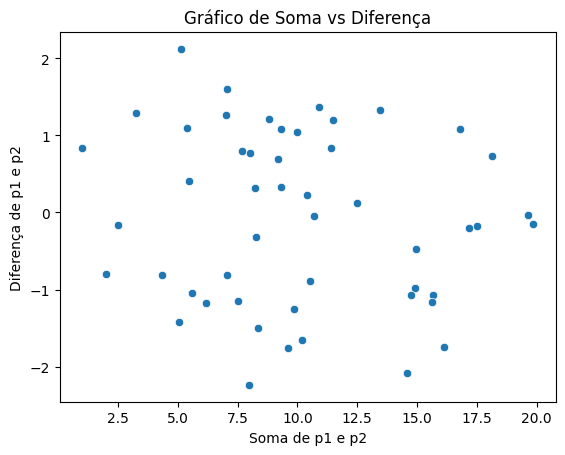

In [10]:
# Transformação para obter soma e diferença
sum_diff_transform_matrix = np.array([[1, 1], [1, -1]])
sum_diff_data = data_matrix @ sum_diff_transform_matrix

df['sum'] = sum_diff_data[:, 0]
df['diff2'] = sum_diff_data[:, 1]

# Imprimindo as primeiras linhas da soma e diferença
print("\nDados transformados (Soma e Diferença):")
print(df[['sum', 'diff2']].head())

# Gráfico para visualizar soma e diferença
sns.scatterplot(x='sum', y='diff2', data=df)
plt.title("Gráfico de Soma vs Diferença")
plt.xlabel("Soma de p1 e p2")
plt.ylabel("Diferença de p1 e p2")
plt.show()